In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Data file.csv')
print(df)

        Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_d

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

As per the information my data set contains total of 36 columns and 209593 rows,in this 21 are float and 13 are numerical  and 3 are categorical

In [4]:
#check any null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

As per the Above formula our data set is clean

In [5]:
#Remove unwanted Columns
df.drop(['Unnamed: 0','msisdn','pcircle','pdate'],axis=1,inplace=True)

# Data Pre-Processing

Replace some unwanted amount with loan amount(6)

In [6]:
a=list(df['maxamnt_loans30'])

In [7]:
first=[]

for i in a:
    first.append(int(i))
    
first

[6,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 6,
 12,
 6,
 12,
 6,
 6,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 12,
 6,
 6,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 61907,
 12,
 12,
 6,
 6,
 6,
 12,
 22099,
 6,
 0,
 6,
 6,
 12,
 6,
 12,
 6,
 6,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 6,
 98745,
 12,
 6,
 0,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 12,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 12,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 6,
 0,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 12,
 0,
 12,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 6,
 6,


In [8]:
second=[]

for i in first:
    if i>12:
        second.append(6)
    else:
        second.append(i)
        
second
    

[6,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 6,
 12,
 6,
 12,
 6,
 6,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 12,
 6,
 6,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 12,
 6,
 6,
 6,
 12,
 6,
 6,
 0,
 6,
 6,
 12,
 6,
 12,
 6,
 6,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 6,
 6,
 12,
 6,
 0,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 12,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 12,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 6,
 0,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 12,
 0,
 12,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [9]:
df['maxamnt_loans30']=second

In [10]:
df['cnt_loans90'].value_counts()

1.000000       73862
2.000000       37286
3.000000       23986
4.000000       16761
5.000000       12331
               ...  
3043.099370        1
2667.929173        1
2508.179038        1
2604.261985        1
4876.239599        1
Name: cnt_loans90, Length: 1110, dtype: int64

In [11]:
df['cnt_loans90']=(df['amnt_loans90']/df['maxamnt_loans90'])

In [12]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,207550.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,6.654554,0.054029,3.493893,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,2.147858,0.218039,3.695830,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,4.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,12.000000,3.000000,71.000000,438.000000,12.000000,3.000000,171.500000,171.500000


If we observe the above columns value list all are having huge difference from 75% to 100%,so we conclude there are outliers

<AxesSubplot:>

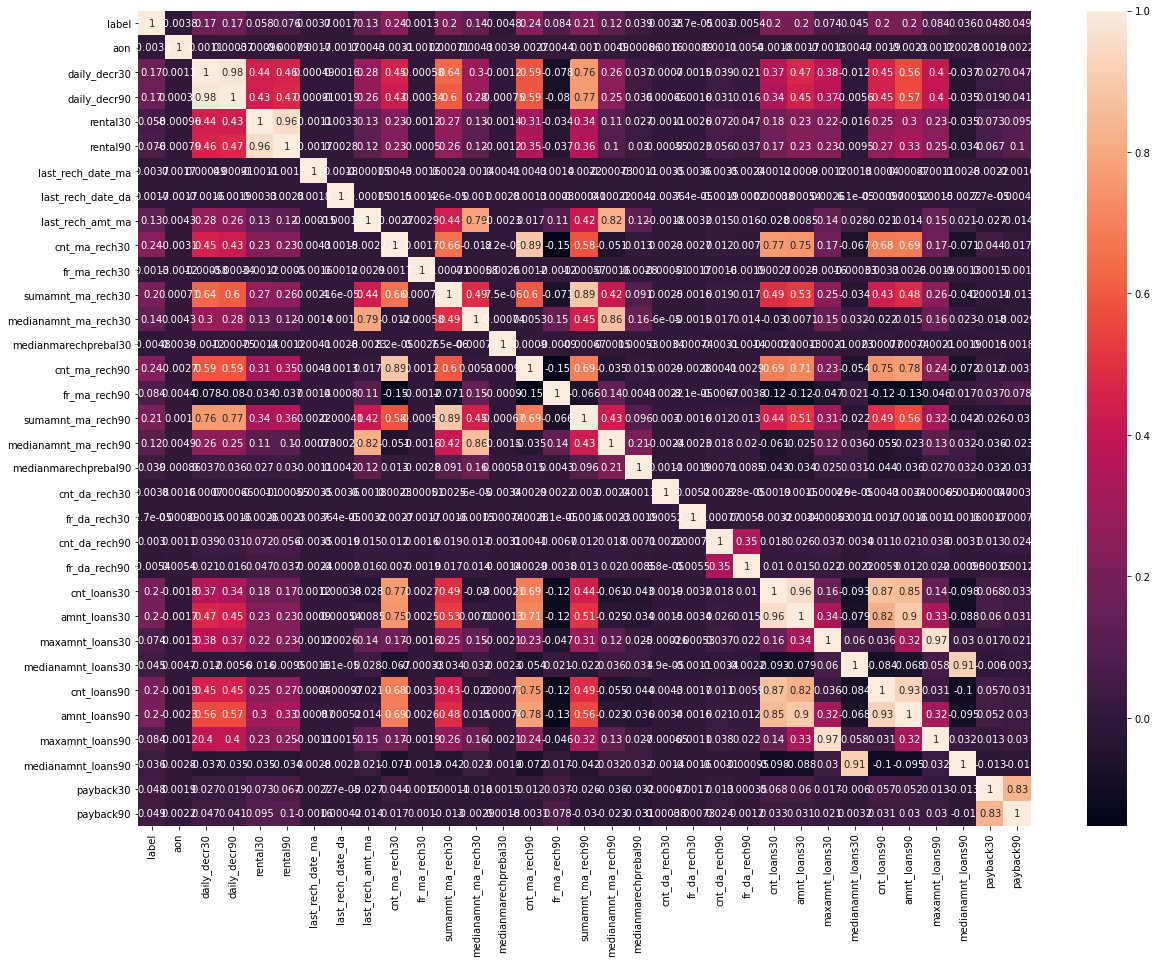

In [13]:
plt.figure(figsize=(20,15))
corr=df.corr()
sns.heatmap(data=corr,annot=True)

From this co-relation chart we can drop the column which highly co releated to each others

In [14]:
df.drop(['daily_decr30','payback30','medianamnt_ma_rech30','medianamnt_ma_rech90','rental30'],axis=1,inplace=True)

In [15]:
df

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
0,0,272.0,3065.150000,260.13,2.0,0.0,1539,2,21.0,3078.0,...,0,2,12,6,0.0,2.0,12,6,0.0,29.000000
1,1,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0.0,5787.0,...,0,1,12,12,0.0,1.0,12,12,0.0,0.000000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,...,0,1,6,6,0.0,1.0,6,6,0.0,0.000000
3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,...,0,2,12,6,0.0,2.0,12,6,0.0,0.000000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,...,0,7,42,6,0.0,7.0,42,6,0.0,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,10404.0,...,0,2,12,6,0.0,2.0,12,6,0.0,1.000000
209589,1,1075.0,36.936000,1728.36,4.0,0.0,773,4,1.0,3092.0,...,0,3,18,6,0.0,3.0,18,6,0.0,1.000000
209590,1,1013.0,11904.350000,8893.20,3.0,0.0,1539,5,8.0,9334.0,...,0,4,42,12,0.0,4.5,54,12,0.0,3.833333
209591,1,1732.0,12574.370000,984.58,2.0,38.0,773,5,4.0,12154.0,...,0,2,18,12,0.0,2.0,24,12,0.0,10.500000


#Visualization

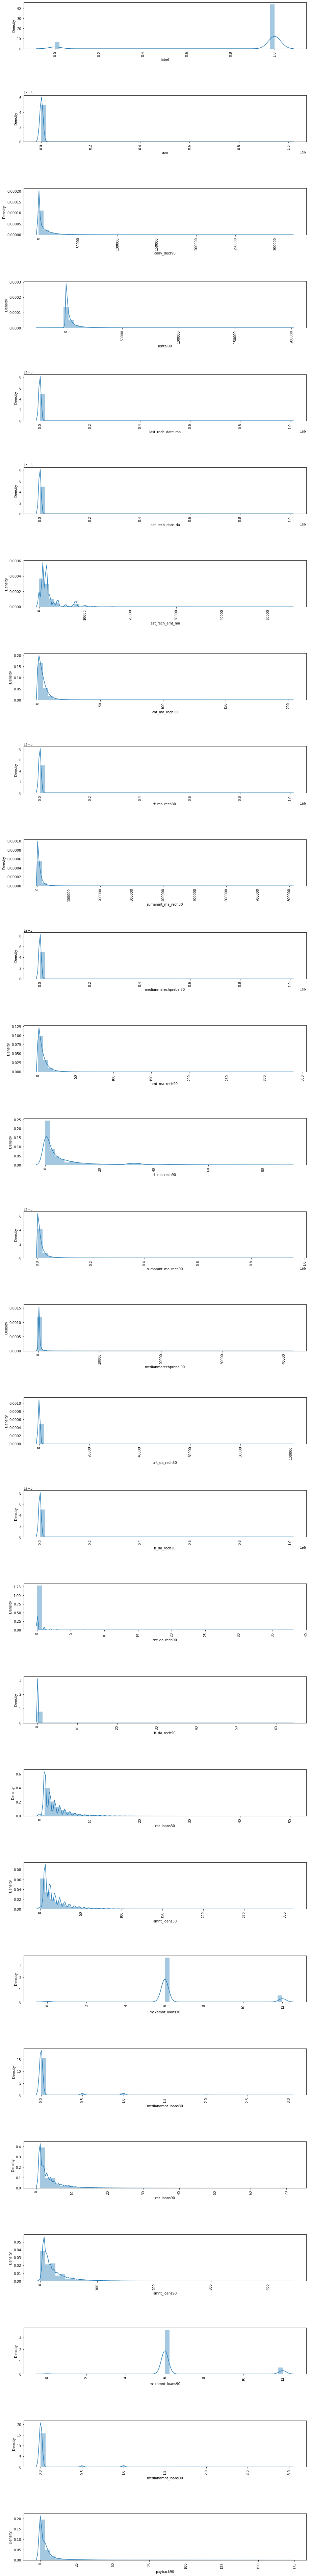

In [16]:
plt.figure(figsize=[15,200])
for i, column_data in enumerate(df.dtypes.items()):
    column,dtype = column_data
    plt.subplot(40,1,i+1)
    plt.subplots_adjust(hspace=1)
    
    if dtype == 'object':
        plt.xticks(rotation=90)
        sns.countplot(df[column])
    else:
        plt.xticks(rotation=90)
        sns.distplot(df[column],kde=True)

AS Above graphs we observed That all are either Right skewed or Left skewed so ,remove the outliers and skew the data

In [17]:
x_col=df.columns.values
x_col

array(['label', 'aon', 'daily_decr90', 'rental90', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90',
       'payback90'], dtype=object)

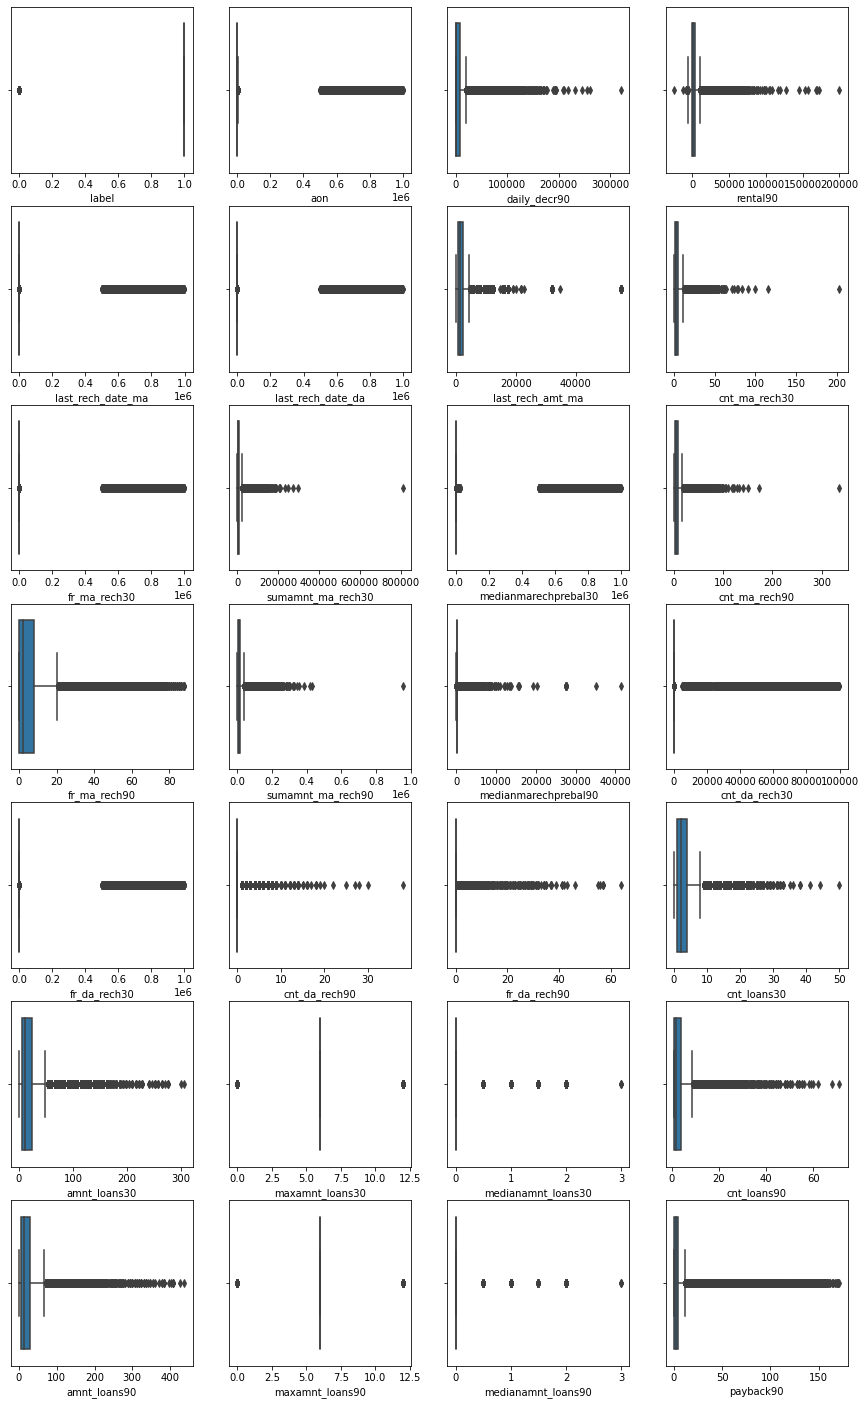

In [18]:
plt.figure(figsize=(15,25))
for i in range(len(x_col)):
    plt.subplot(7,4,i+1)
    sns.boxplot(df[x_col[i]])

In [19]:
from scipy.stats import zscore
import numpy as np

In [20]:
z=np.abs(zscore(df.iloc[:,1:]))
z

array([[0.10357685, 0.27634619, 0.55858346, ..., 0.33421157, 0.22959366,
        2.39409346],
       [0.09776412, 0.5533797 , 0.03602034, ..., 2.51768994, 0.22959366,
        0.41923266],
       [0.10010243, 0.42903256, 0.44767352, ..., 0.33421157, 0.22959366,
        0.41923266],
       ...,
       [0.09378769, 0.53319431, 0.93749981, ..., 2.51768994, 0.22959366,
        0.04735622],
       [0.08428915, 0.59455827, 0.4330386 , ..., 2.51768994, 0.22959366,
        0.59938541],
       [0.08628398, 0.14174607, 0.49427822, ..., 2.51768994, 0.22959366,
        0.41923266]])

In [21]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([11, 11, 26, ..., 23, 21, 25], dtype=int64))


In [22]:
df_new=df[(z<3) .all(axis=1)]
df_new

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90


In [23]:
df.isnull().sum()

label                      0
aon                        0
daily_decr90               0
rental90                   0
last_rech_date_ma          0
last_rech_date_da          0
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianmarechprebal30       0
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianmarechprebal90       0
cnt_da_rech30              0
fr_da_rech30               0
cnt_da_rech90              0
fr_da_rech90               0
cnt_loans30                0
amnt_loans30               0
maxamnt_loans30            0
medianamnt_loans30         0
cnt_loans90             2043
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback90                  0
dtype: int64

In [24]:
df['cnt_loans90']=df['cnt_loans90'].replace(np.NaN,1)

In [25]:
df['cnt_loans90'].isnull().sum()

0

In [26]:
z=np.abs(zscore(df.iloc[:,1:]))
z

array([[0.10357685, 0.27634619, 0.55858346, ..., 0.33421157, 0.22959366,
        2.39409346],
       [0.09776412, 0.5533797 , 0.03602034, ..., 2.51768994, 0.22959366,
        0.41923266],
       [0.10010243, 0.42903256, 0.44767352, ..., 0.33421157, 0.22959366,
        0.41923266],
       ...,
       [0.09378769, 0.53319431, 0.93749981, ..., 2.51768994, 0.22959366,
        0.04735622],
       [0.08428915, 0.59455827, 0.4330386 , ..., 2.51768994, 0.22959366,
        0.59938541],
       [0.08628398, 0.14174607, 0.49427822, ..., 2.51768994, 0.22959366,
        0.41923266]])

In [27]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([11, 11, 26, ..., 23, 21, 25], dtype=int64))


In [28]:
df_new=df[(z<3) .all(axis=1)]
df_new

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
0,0,272.0,3065.150000,260.13,2.0,0.0,1539,2,21.0,3078.0,...,0,2,12,6,0.0,2.0,12,6,0.0,29.000000
1,1,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0.0,5787.0,...,0,1,12,12,0.0,1.0,12,12,0.0,0.000000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,...,0,1,6,6,0.0,1.0,6,6,0.0,0.000000
3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,...,0,2,12,6,0.0,2.0,12,6,0.0,0.000000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,...,0,7,42,6,0.0,7.0,42,6,0.0,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,10404.0,...,0,2,12,6,0.0,2.0,12,6,0.0,1.000000
209589,1,1075.0,36.936000,1728.36,4.0,0.0,773,4,1.0,3092.0,...,0,3,18,6,0.0,3.0,18,6,0.0,1.000000
209590,1,1013.0,11904.350000,8893.20,3.0,0.0,1539,5,8.0,9334.0,...,0,4,42,12,0.0,4.5,54,12,0.0,3.833333
209591,1,1732.0,12574.370000,984.58,2.0,38.0,773,5,4.0,12154.0,...,0,2,18,12,0.0,2.0,24,12,0.0,10.500000


In [29]:
print(df.shape)
print(df_new.shape)

(209593, 28)
(163218, 28)


In [30]:
loss_percent=(209593-163218)/209593*100
print(loss_percent)

22.126216047291656


After Outliers almost 22.12% of data is cleaned

In [31]:
df_new.skew()

label                   -2.077926
aon                      0.957779
daily_decr90             2.145908
rental90                 2.304190
last_rech_date_ma        3.121663
last_rech_date_da       10.414686
last_rech_amt_ma         2.109427
cnt_ma_rech30            1.182328
fr_ma_rech30             1.990786
sumamnt_ma_rech30        1.649816
medianmarechprebal30    10.453860
cnt_ma_rech90            1.302471
fr_ma_rech90             1.977063
sumamnt_ma_rech90        1.725457
medianmarechprebal90     3.689801
cnt_da_rech30           51.440273
fr_da_rech30             0.000000
cnt_da_rech90            6.924375
fr_da_rech90             0.000000
cnt_loans30              1.469220
amnt_loans30             1.454714
maxamnt_loans30          2.661007
medianamnt_loans30       5.315971
cnt_loans90              1.625361
amnt_loans90             1.590265
maxamnt_loans90          2.630939
medianamnt_loans90       6.082070
payback90                2.688074
dtype: float64

from the data all our data is more than 0.5 except fr_da_rech90,fr_da_rech30

In [32]:
df_new.shape

(163218, 28)

As we have almost 28 columns by using vif or pca technique to make our data modelling accuracy

In [33]:
x=df_new.iloc[:,1:]
x

,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianmarechprebal30,...,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
0,272.0,3065.150000,260.13,2.0,0.0,1539,2,21.0,3078.0,7.50,...,0,2,12,6,0.0,2.0,12,6,0.0,29.000000
1,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0.0,5787.0,61.04,...,0,1,12,12,0.0,1.0,12,12,0.0,0.000000
2,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,66.32,...,0,1,6,6,0.0,1.0,6,6,0.0,0.000000
3,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,0.00,...,0,2,12,6,0.0,2.0,12,6,0.0,0.000000
4,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,29.00,...,0,7,42,6,0.0,7.0,42,6,0.0,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,10404.0,91.81,...,0,2,12,6,0.0,2.0,12,6,0.0,1.000000
209589,1075.0,36.936000,1728.36,4.0,0.0,773,4,1.0,3092.0,161.30,...,0,3,18,6,0.0,3.0,18,6,0.0,1.000000
209590,1013.0,11904.350000,8893.20,3.0,0.0,1539,5,8.0,9334.0,51.13,...,0,4,42,12,0.0,4.5,54,12,0.0,3.833333
209591,1732.0,12574.370000,984.58,2.0,38.0,773,5,4.0,12154.0,164.00,...,0,2,18,12,0.0,2.0,24,12,0.0,10.500000


In [34]:
y=df_new.iloc[:,0:1]

In [35]:
y.value_counts()

label
1        140407
0         22811
dtype: int64

As we can see the output values are imbalanced so our model will not provide the correct output,so for that need to do SMOTE Analysis 

In [36]:
x.isnull().sum()

aon                     0
daily_decr90            0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback90               0
dtype: int64

In [37]:
x['rental90'].value_counts()

0.00        6098
200.13       754
99.56        619
60.00        575
90.00        553
            ... 
18580.29       1
1349.25        1
1587.64        1
8610.88        1
16877.73       1
Name: rental90, Length: 108218, dtype: int64

In [38]:
x['rental90']=x['rental90'].replace(np.NaN,x['rental90'].median())

In [39]:
x['rental90'].value_counts()

0.00        6098
200.13       754
99.56        619
60.00        575
90.00        553
            ... 
18580.29       1
1349.25        1
1587.64        1
8610.88        1
16877.73       1
Name: rental90, Length: 108218, dtype: int64

In [40]:
#Skewing the data using power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [41]:
x

array([[-0.71199803,  0.55834857, -0.6086743 , ..., -0.34645544,
        -0.16019958,  1.86462185],
       [ 0.26287213,  1.25697288,  0.41388276, ...,  2.95819643,
        -0.16019958, -0.98809113],
       [-0.09538896,  0.22416233, -0.3827442 , ..., -0.34645544,
        -0.16019958, -0.98809113],
       ...,
       [ 0.81186619,  1.24658975,  1.67256609, ...,  2.95819643,
        -0.16019958,  0.80286771],
       [ 1.94352115,  1.27767352, -0.35538903, ...,  2.95819643,
        -0.16019958,  1.40255372],
       [ 1.72097023,  0.74172146, -0.47281032, ...,  2.95819643,
        -0.16019958, -0.98809113]])

In [42]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
x=mn.fit_transform(x)
x

array([[0.46473342, 0.97967961, 0.84441062, ..., 0.        , 0.        ,
        0.97549273],
       [0.60864756, 0.98964302, 0.87756984, ..., 1.        , 0.        ,
        0.        ],
       [0.55575966, 0.97491362, 0.85173702, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.68969221, 0.98949494, 0.9183861 , ..., 1.        , 0.        ,
        0.6124231 ],
       [0.85675154, 0.98993824, 0.85262409, ..., 1.        , 0.        ,
        0.81748731],
       [0.8238977 , 0.98229478, 0.84881638, ..., 1.        , 0.        ,
        0.        ]])

In [43]:
print(x.shape)
print(y.shape)

(163218, 27)
(163218, 1)


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(130574, 27)
(130574, 1)
(32644, 27)
(32644, 1)


In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

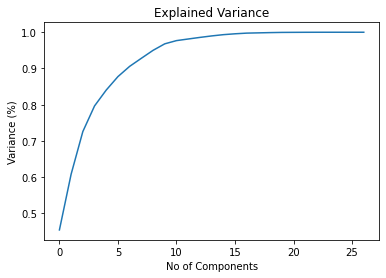

In [47]:
pca=PCA()
PrincipalComponents=pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

From the graph we observe inbetween 10-15 we are getting the maximum of 95% variance

In [48]:
pca=PCA(n_components=12)
new_data=pca.fit_transform(x)
x1=pd.DataFrame(new_data,columns=['pca-1','pca-2','pca-3','pca-4','pca-5','pca-6','pca-7','pca-8','pca-9','pca-10','pca-11','pca-12'])

In [49]:
x1

,pca-1,pca-2,pca-3,pca-4,pca-5,pca-6,pca-7,pca-8,pca-9,pca-10,pca-11,pca-12
0,0.387731,-0.337387,0.450958,-0.562674,-0.060233,0.170275,0.368416,-0.173663,0.014938,0.085311,-0.071715,-0.029747
1,-0.335246,1.446754,-0.073175,0.244700,0.027156,0.303617,0.109689,0.184057,-0.135762,0.057697,-0.110287,-0.020276
2,-0.875629,0.058564,-0.098013,0.251079,-0.008625,0.091060,0.094125,0.007203,-0.031430,0.001968,-0.047961,0.010749
3,-0.748407,-0.010946,-0.371629,-0.078437,0.021326,0.080742,-0.139899,0.268791,-0.149420,0.232302,0.169716,-0.096151
4,0.788059,-0.237074,-0.282879,0.270125,-0.025668,-0.017998,-0.099480,0.136508,-0.075258,-0.037797,-0.120712,0.046514
...,...,...,...,...,...,...,...,...,...,...,...,...
163213,0.076921,-0.113930,0.125017,0.273460,-0.013801,0.133108,0.123282,0.049113,-0.061512,0.097039,-0.115258,0.023980
163214,0.116741,-0.166607,-0.184917,0.023303,-0.044632,-0.082004,-0.173493,0.034619,-0.017783,-0.131585,-0.013828,-0.046584
163215,1.090527,1.072443,-0.012497,-0.284141,-0.076768,-0.119781,-0.013314,0.084472,-0.064187,-0.069976,0.034754,-0.018398
163216,0.788245,1.127322,0.040773,-0.335080,-0.072865,0.083517,0.235746,0.177793,0.810211,-0.320922,-0.050275,0.059462


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.20)

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(130574, 12)
(130574, 1)
(32644, 12)
(32644, 1)


In [52]:
smt=SMOTE()
x_train,y_train = smt.fit_resample(x_train,y_train)

In [53]:
x_train

,pca-1,pca-2,pca-3,pca-4,pca-5,pca-6,pca-7,pca-8,pca-9,pca-10,pca-11,pca-12
0,0.688358,-0.325591,-0.090869,-0.285319,-0.051594,0.001903,-0.088943,-0.036108,-0.007843,0.030971,0.062999,0.028681
1,0.472365,-0.327733,0.067348,-0.558861,1.336211,-0.159537,0.195233,-0.033292,-0.028421,-0.182734,0.097462,-0.089935
2,-1.218337,0.021082,-0.233409,-0.308817,-0.037481,-0.093402,-0.034657,0.092171,-0.044655,-0.259506,0.004292,0.005188
3,0.696698,-0.260385,-0.463644,0.028980,-0.057778,-0.222935,0.354430,0.164588,-0.109037,0.140644,0.115736,-0.016400
4,-1.228316,0.019784,-0.236582,-0.303905,-0.042988,-0.144325,-0.026629,-0.060336,0.009874,0.146084,-0.017284,0.040433
...,...,...,...,...,...,...,...,...,...,...,...,...
224615,-1.227358,0.019785,-0.236402,-0.304593,-0.042651,-0.140843,-0.027222,-0.047431,0.005327,0.110099,-0.018141,0.039667
224616,-1.218880,0.019743,-0.234794,-0.310836,-0.039637,-0.109657,-0.032550,0.068330,-0.035499,-0.212910,-0.026137,0.032615
224617,-1.226802,0.019891,-0.236343,-0.304816,-0.042524,-0.139350,-0.027463,-0.042094,0.003469,0.095229,-0.017912,0.039664
224618,0.410528,-0.252371,-0.247540,-0.158123,-0.015287,0.142016,0.105321,0.003076,-0.043289,0.094071,-0.110075,-0.015853


In [54]:
y_train

,label
0,1
1,1
2,0
3,1
4,1
...,...
224615,0
224616,0
224617,0
224618,0


In [55]:
y_train.shape

(224620, 1)

In [56]:
np.ravel(y_train)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
y_train.value_counts()

label
1        112310
0        112310
dtype: int64

In [58]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [59]:
lm=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()


In [60]:
kf=KFold(n_splits=10,shuffle=True)
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred)*100)

In [61]:
fun(lm)

Accuracy Score 75.61573336600907
Confusion Matrix
 [[ 3525  1022]
 [ 6938 21159]]
Classification Report
               precision    recall  f1-score   support

           0       0.34      0.78      0.47      4547
           1       0.95      0.75      0.84     28097

    accuracy                           0.76     32644
   macro avg       0.65      0.76      0.66     32644
weighted avg       0.87      0.76      0.79     32644

F1 score 84.16802577668165


In [62]:
fun(dtc)

Accuracy Score 78.26553118490381
Confusion Matrix
 [[ 2501  2046]
 [ 5049 23048]]
Classification Report
               precision    recall  f1-score   support

           0       0.33      0.55      0.41      4547
           1       0.92      0.82      0.87     28097

    accuracy                           0.78     32644
   macro avg       0.62      0.69      0.64     32644
weighted avg       0.84      0.78      0.80     32644

F1 score 86.66127728375102


In [63]:
fun(gb)

Accuracy Score 70.59796593554711
Confusion Matrix
 [[ 3477  1070]
 [ 8528 19569]]
Classification Report
               precision    recall  f1-score   support

           0       0.29      0.76      0.42      4547
           1       0.95      0.70      0.80     28097

    accuracy                           0.71     32644
   macro avg       0.62      0.73      0.61     32644
weighted avg       0.86      0.71      0.75     32644

F1 score 80.30613919894944


In [64]:
fun(knn)

Accuracy Score 75.30939835804435
Confusion Matrix
 [[ 2972  1575]
 [ 6485 21612]]
Classification Report
               precision    recall  f1-score   support

           0       0.31      0.65      0.42      4547
           1       0.93      0.77      0.84     28097

    accuracy                           0.75     32644
   macro avg       0.62      0.71      0.63     32644
weighted avg       0.85      0.75      0.78     32644

F1 score 84.28359722330552


# Ensemble Methods

In [65]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBRFClassifier

In [66]:
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
gd=GradientBoostingClassifier()
xgb=XGBClassifier()
sgd=SGDClassifier()
xgbr=XGBRFClassifier()

In [67]:
fun(rfc)

Accuracy Score 84.03381938487931
Confusion Matrix
 [[ 2654  1893]
 [ 3319 24778]]
Classification Report
               precision    recall  f1-score   support

           0       0.44      0.58      0.50      4547
           1       0.93      0.88      0.90     28097

    accuracy                           0.84     32644
   macro avg       0.69      0.73      0.70     32644
weighted avg       0.86      0.84      0.85     32644

F1 score 90.48349401110137


In [68]:
fun(ad)

Accuracy Score 76.42139443695626
Confusion Matrix
 [[ 3521  1026]
 [ 6671 21426]]
Classification Report
               precision    recall  f1-score   support

           0       0.35      0.77      0.48      4547
           1       0.95      0.76      0.85     28097

    accuracy                           0.76     32644
   macro avg       0.65      0.77      0.66     32644
weighted avg       0.87      0.76      0.80     32644

F1 score 84.77319036974026


In [69]:
fun(gd)

Accuracy Score 77.70187477024875
Confusion Matrix
 [[ 3509  1038]
 [ 6241 21856]]
Classification Report
               precision    recall  f1-score   support

           0       0.36      0.77      0.49      4547
           1       0.95      0.78      0.86     28097

    accuracy                           0.78     32644
   macro avg       0.66      0.77      0.67     32644
weighted avg       0.87      0.78      0.81     32644

F1 score 85.72493185071876


In [70]:
fun(xgb)

[10:56:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score 77.65898786913368
Confusion Matrix
 [[ 3514  1033]
 [ 6260 21837]]
Classification Report
               precision    recall  f1-score   support

           0       0.36      0.77      0.49      4547
           1       0.95      0.78      0.86     28097

    accuracy                           0.78     32644
   macro avg       0.66      0.78      0.67     32644
weighted avg       0.87      0.78      0.81     32644

F1 score 85.69074106774973


In [71]:
fun(sgd)

Accuracy Score 76.13956622962871
Confusion Matrix
 [[ 3383  1164]
 [ 6625 21472]]
Classification Report
               precision    recall  f1-score   support

           0       0.34      0.74      0.46      4547
           1       0.95      0.76      0.85     28097

    accuracy                           0.76     32644
   macro avg       0.64      0.75      0.66     32644
weighted avg       0.86      0.76      0.79     32644

F1 score 84.64707389667474


In [72]:
fun(xgbr)

[10:59:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score 77.7968386227178
Confusion Matrix
 [[ 3454  1093]
 [ 6155 21942]]
Classification Report
               precision    recall  f1-score   support

           0       0.36      0.76      0.49      4547
           1       0.95      0.78      0.86     28097

    accuracy                           0.78     32644
   macro avg       0.66      0.77      0.67     32644
weighted avg       0.87      0.78      0.81     32644

F1 score 85.8249237268247


# Export The Data

In [73]:
import pickle
filename="microfinance.pkl"
pickle.dump(rfc,open(filename,'wb'))

In [74]:
a=rfc.predict(x_test)
b=np.ravel(y_test)
df_com=pd.DataFrame({'orginal':b,'predicted':a},index=range(len(a)))

In [75]:
df_com

,orginal,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
32639,1,1
32640,1,1
32641,1,1
32642,1,1
